In [79]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [80]:
#向前欧拉法

def front_euler(x_0, y_0, f, h, n):
    x = [x_0 + i*h for i in range(int(n+1))]
    y = [y_0]
    for i in range(int(n)):
        y.append(y[i] + h*f(x[i],y[i]))
    return np.array([x,y])

#改进欧拉法

def improved_euler(x_0, y_0, f, h, n):
    x = [x_0 +i*h for i in range(int(n+1))]
    y = [y_0]
    for i in range(int(n)):
        K1 = f(x[i],y[i])
        K2 = f(x[i]+h, y[i]+h*K1)
        y.append(y[i] + h/2 * (K1+K2))
    return np.array([x,y])

#经典四阶龙格库塔法

def RK4(x_0,y_0,f,h,n):
    x = [x_0 + i*h for i in range(int(n+1))]
    y = [y_0]
    for i in range(int(n)):
        K1 = f(x[i],y[i])
        K2 = f(x[i]+1/2*h, y[i]+1/2*h*K1)
        K3 = f(x[i]+1/2*h, y[i] + 1/2*h*K2)
        K4 = f(x[i]+h, y[i]+h*K3)
        y.append(y[i] + h/6*(K1+2*K2+2*K3+K4))
    return np.array([x,y])

#BDF-2法

def BDF2_f(x_0,y_0,f,h,n):
    x = [x_0 + i*h for i in range(int(n)+1)]
    #不妨第一个点利用向后欧拉法计算
    y_1 = (x[1]*y_0+h/x[1])/(x[1]+h)
    y = [y_0,y_1]
    for i in range(2,int(n)+1):
        y.append((2/3*h/(x[i]**2)-y[i-2]/3+4/3*y[i-1])/(1+2/3*h/x[i]))
    return np.array([x,y])



一、给定初值问题：
$$\begin{cases}
        y' = \frac{1}{x^2} - \frac{y}{x} , \enspace 1 \leq x \leq 2\\
        y(1) = 1
    \end{cases}$$

记$$f(x,y) = \frac{1}{x^2} - \frac{y}{x}$$
解得解析解为：$$u(x) = \frac{1+ \ln x}{x}$$

特殊的，考虑BDF-2法
$$y_{n+2} - \frac43 y_{n+1} + \frac13 y_n = \frac23 h f(t_{n+2}, y_{n+2})$$
代入函数方程，解隐式方程得：
$$y_{n+2} = (\frac{2h}{3x_{n+2}^2}-\frac{y_{n}}{3} + \frac43 y_{n+1})(1+\frac{2h}{3x_{n+2}})^{-1}$$

In [81]:
def f(x,y):
    x = np.array(x)
    y = np.array(y)
    return 1/(x**2) - y/x 

def u(x):
    x = np.array(x)
    return 1/x + np.log(x)/x

取步长分别为$$h = [0.2，0.1，0.05，0.02，0.01，0.001]$$

In [82]:
h = [0.2,0.1,0.05,0.02,0.01,0.001]

In [84]:
# 定义一个比较函数，用于比较不同步长下的解和误差
def compare_plot(solver,x_0,y_0,f,h,interval,u):
    sol = []
    error = []
    xx = [x_0 + i*h[-1] for i in range(int(interval/h[-1])+1)]
    xx = np.array(xx)
    true = [xx,u(xx)]
    fig=plt.figure(figsize = (5,15))
    ax1 = fig.add_subplot(3,1,1)
    for i in range(len(h)):
        vector = solver(x_0,y_0,f,h[i],interval/h[i])
        ax1.plot(vector[0],vector[1],label = 'h = '+str(h[i]))
        error.append(abs(true[1][-1]-vector[1][-1]))
        sol.append(vector)
    ax1.plot(true[0],true[1],'r',label = 'exact solution')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('solution')
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(h,error)
    plt.xlabel('h')
    plt.ylabel('error')
    plt.title('step-error')
    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(np.log(h),np.log(error))
    plt.xlabel('log(h)')
    plt.ylabel('log(error)')
    plt.title('log(step)-log(error)')
    print('The order of the method is '+str(int((np.log(error[-1])-np.log(error[0]))/(np.log(h[-1])-np.log(h[0]))+0.5)))
    return sol
    

1、向前Euler法的图像比较以及收敛阶图像

The order of the method is 1


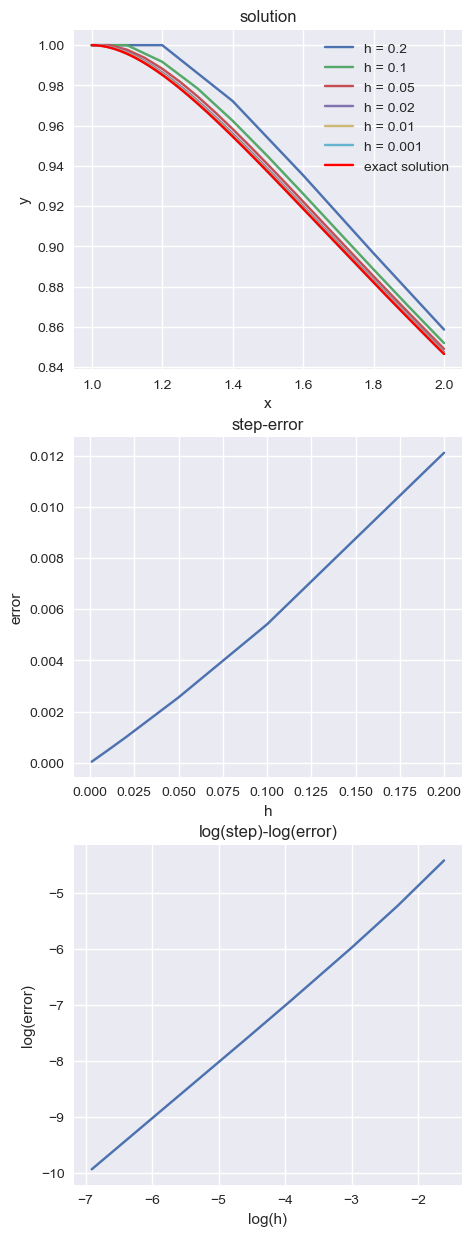

In [85]:
sol1 = compare_plot(front_euler, 1, 1, f, h, 1, u)

2、改进的Euler法的图像比较以及收敛阶图像

The order of the method is 2


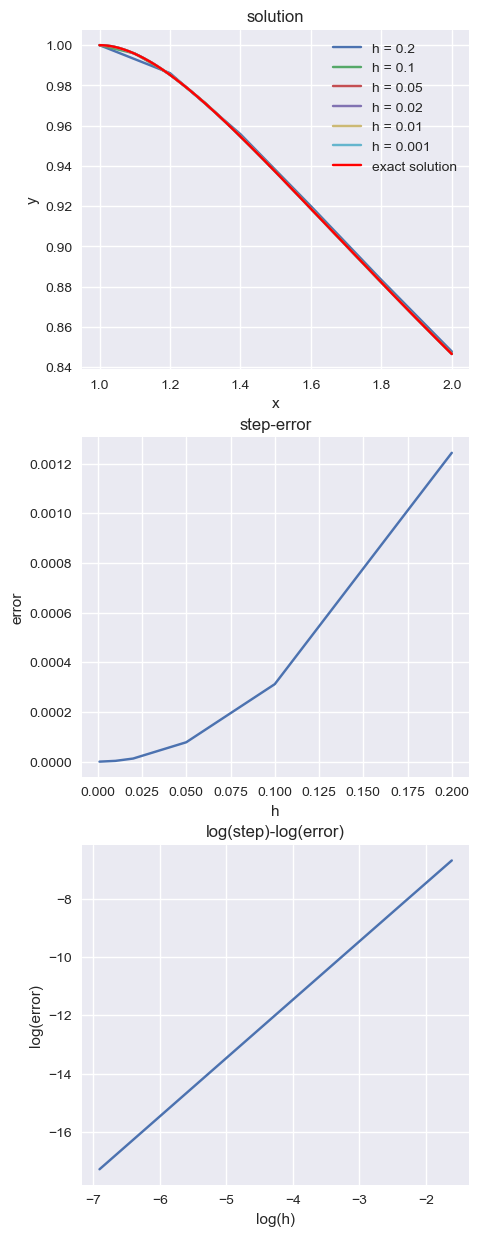

In [86]:
sol2 = compare_plot(improved_euler, 1, 1, f, h,1,u)

3、经典四阶R-K法的图像比较以及收敛阶图像

The order of the method is 4


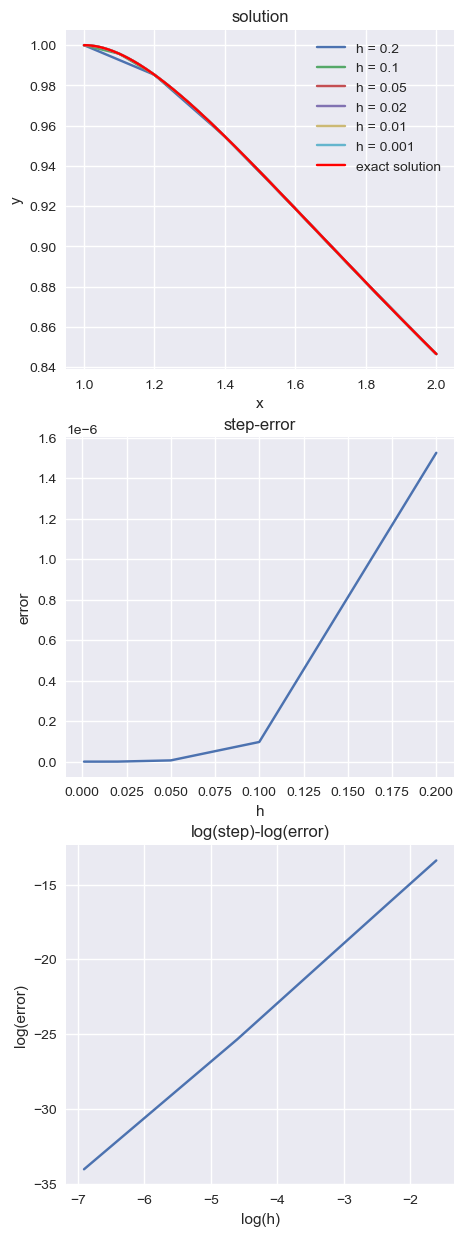

In [87]:
sol3 = compare_plot(RK4,1,1,f,h,1,u)

4、BDF-2法的图像比较以及收敛阶图像

The order of the method is 2


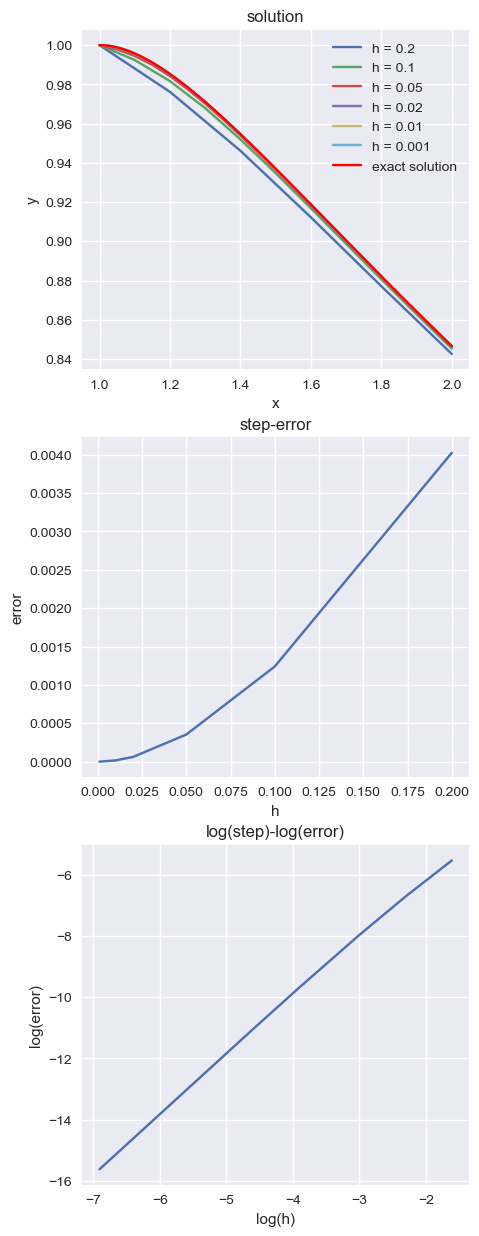

In [88]:
sol4 = compare_plot(BDF2_f,1,1,f, h,1,u)

二、利用经典四阶R-K方法解Lorenz方程

$$\begin{cases}
        x'(t) = 10(y-x)\\
        y'(t) = 28x-y-zx \\
        z'(t) = xy - \frac83 z
    \end{cases}$$

In [89]:
#选择经典四阶R-K方法

def RK4_h(t_0,y_0,f,h,n):
    t = [t_0 + i*h for i in range(int(n+1))]
    y = [y_0.tolist()]
    for i in range(int(n)):
        K1 = f(t[i],y[i])
        K2 = f(t[i]+1/2*h, y[i]+1/2*h*K1)
        K3 = f(t[i]+1/2*h, y[i] + 1/2*h*K2)
        K4 = f(t[i]+h, y[i]+h*K3)
        y.append((y[i] + h/6*(K1+2*K2+2*K3+K4)).tolist())
    xx,yy,zz = [],[],[]
    for i in range(len(y)):
        xx.append(y[i][0])
        yy.append(y[i][1])
        zz.append(y[i][2])
    return [t,xx,yy,zz]

#Lorenz方程
def Lorenz(_,x):
    return np.array([10*(x[1]-x[0]),28*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-8/3*x[2]])


In [90]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


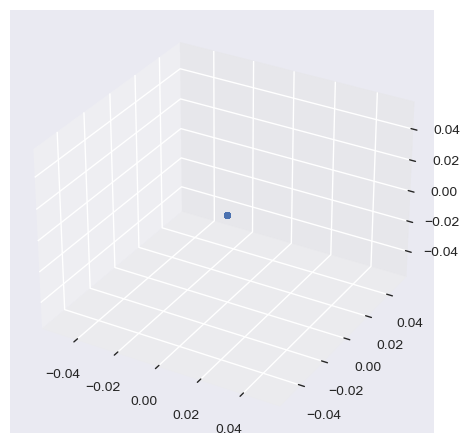

In [91]:
#尝试起始点（0,0,0）

v =RK4_h(0,np.array([0,0,0]),Lorenz,0.01,3000)
v = np.array(v)
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter(v[1],v[2],v[3],'blue')#绘制空间曲线
plt.show()

#稳定于原点

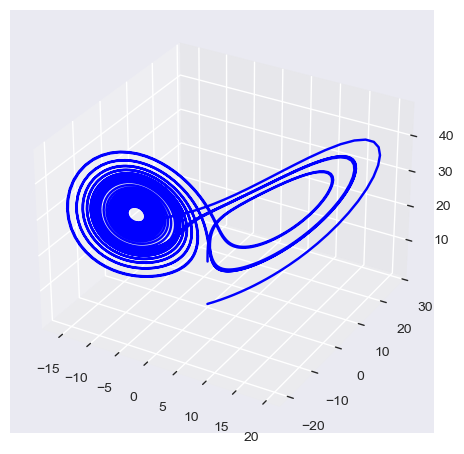

In [92]:
#尝试起始点（0.01, 0.01, 0.01）

v =RK4_h(0,np.array([0.01,0.01,0.01]),Lorenz,0.01,3000)
v = np.array(v)
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot3D(v[1],v[2],v[3],'blue')#绘制空间曲线
plt.show()


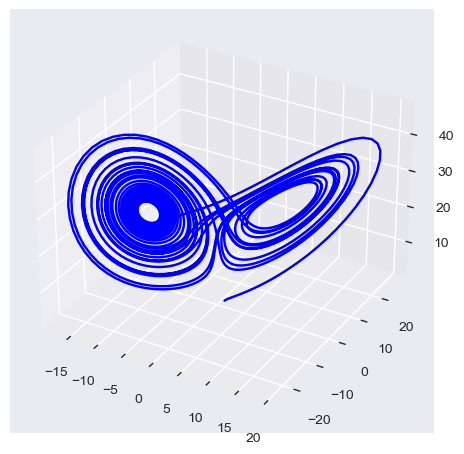

In [93]:
#尝试起始点（1, 1, 1）

v =RK4_h(0,np.array([1,1,1]),Lorenz,0.01,3000)
v = np.array(v)
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot3D(v[1],v[2],v[3],'blue')#绘制空间曲线
plt.show()


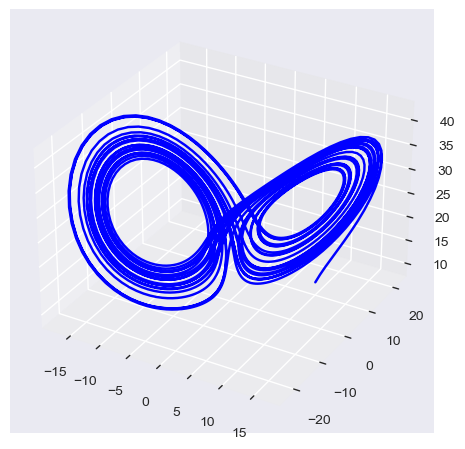

In [94]:
#尝试起始点（10, 10, 10）

v =RK4_h(0,np.array([10,10,10]),Lorenz,0.01,3000)
v = np.array(v)
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot3D(v[1],v[2],v[3],'blue')#绘制空间曲线
plt.show()


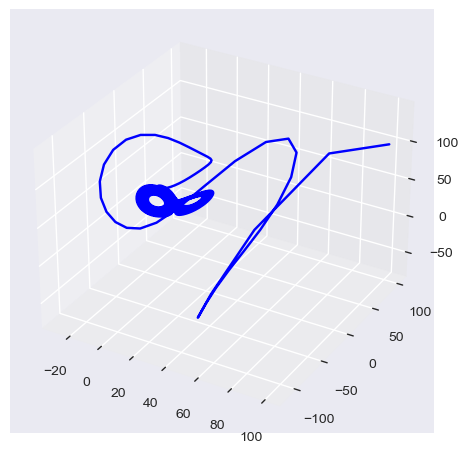

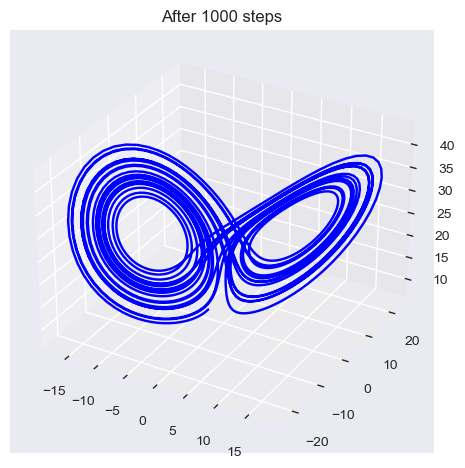

In [95]:
#尝试起始点（100, 100, 100）

v =RK4_h(0,np.array([100,100,100]),Lorenz,0.01,3000)
v = np.array(v)
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot3D(v[1],v[2],v[3],'blue')#绘制空间曲线

#观察末尾形态
fig = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot3D(v[1][500:],v[2][500:],v[3][500:],'blue')#绘制空间曲线尾
plt.title('After 1000 steps')
plt.show()


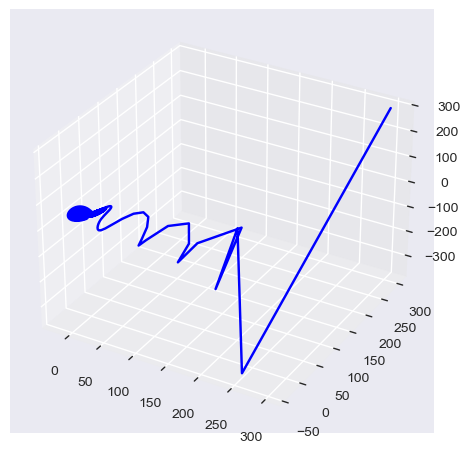

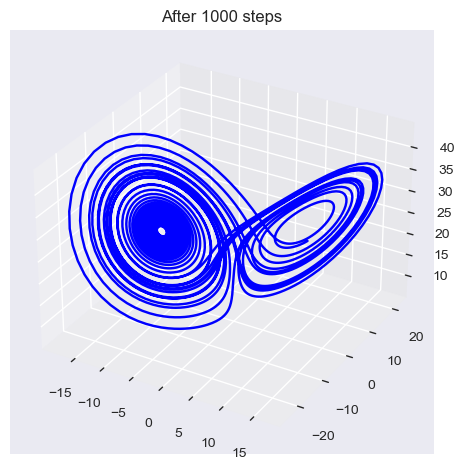

In [96]:
#尝试起始点（200, 200, 200）

v =RK4_h(0,np.array([300,300,300]),Lorenz,0.01,5000)
v = np.array(v)
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot3D(v[1],v[2],v[3],'blue')#绘制空间曲线

#观察末尾形态
fig = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot3D(v[1][1000:],v[2][1000:],v[3][1000:],'blue')#绘制空间曲线尾部
plt.title('After 1000 steps')
plt.show()


我们可以发现，当初始点设为(0,0,0)时，方程的解在原点处稳定，恒为原点；

当初始点偏离原点时，方程的解均被吸引至$[-15,15]\times[-20,20]\times[10,40]$内的两个平面上绕圈，方程关于零解不稳定。并且在一侧绕完后随机跳转到另一侧绕圈。